**3. zadatak - Interpolacija (LV3)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import sign
from scipy.linalg import lu, lu_factor, lu_solve
from scipy.interpolate import lagrange


In [2]:
# Podaci
x = np.array([0,1,2.5,3,4.5,5,6])
y = np.array([2,5.4375,7.3516,7.5625,8.4453,9.1875,12])

1. Konstruirajte:

• Lagrangeov interpolacijski polinom,

• Newtonov interpolacijski polinom.

Lagrange

Lagrangeov interpolant P(x):
           6             5             4          3         2
7.901e-07 x - 1.611e-05 x + 0.0001248 x + 0.1454 x - 1.374 x + 4.666 x + 2


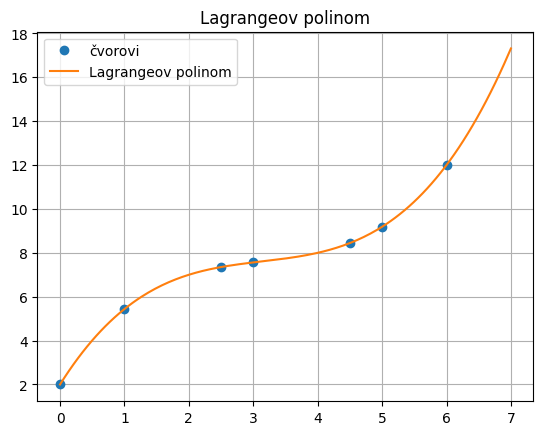

In [8]:
# Lagrangeov interpolant
P = lagrange(x, y)

# Ispis interpolacijskog polinoma
print("Lagrangeov interpolant P(x):")
print(P)

# evaluacija
x_new = np.linspace(0, 7, 200)
y_new = P(x_new)
plt.title("Lagrangeov polinom")
plt.plot(x, y, "o", label="čvorovi")
plt.plot(x_new, y_new, "-", label="Lagrangeov polinom")
plt.grid(True)
plt.legend()
plt.show()


Newton

NEWTON
Koeficijenti Newtonovog polinoma (a0, a1, a2, ...):
[ 2.00000000e+00  3.43750000e+00 -8.64573333e-01  1.45813333e-01
  9.73544974e-06 -3.47089947e-06  7.90123457e-07]


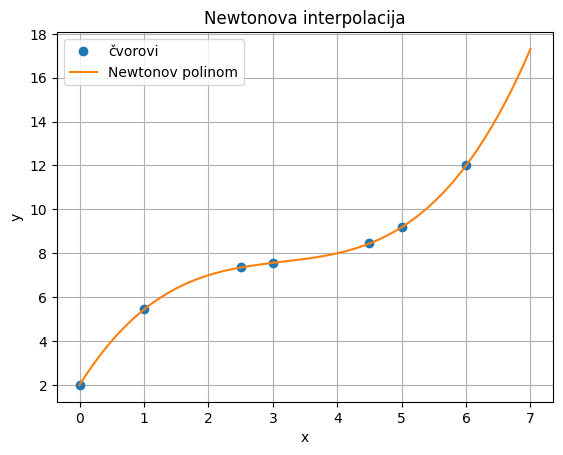

In [4]:
def newton_coefficients(x, y):
    """
    Računanje koeficijenata Newtonovog interpolacijskog polinoma
    pomoću podijeljenih razlika.

    x, y : 1D numpy polja iste duljine
    vraća: 1D numpy polje koeficijenata a_0, a_1, ..., a_{n-1}
    """
    n = len(x)
    # kopija y, u nju spremamo podijeljene razlike
    coef = y.astype(float).copy()

    # j = red podijeljene razlike
    for j in range(1, n):
        # i = početni indeks u stupcu
        for i in range(n-1, j-1, -1):
            coef[i] = (coef[i] - coef[i-1]) / (x[i] - x[i-j])
    return coef

def newton_evaluate(x_data, coef, x):
    """
    Evaluacija Newtonovog polinoma u točki/vektoru x
    pomoću Hornerove sheme.

    x_data : čvorovi (x_0, ..., x_{n-1})
    coef   : koeficijenti (a_0, ..., a_{n-1})
    x      : može biti skalar ili numpy polje
    """
    n = len(coef)
    # počinjemo od zadnjeg koeficijenta
    p = coef[-1]
    # Horner od n-2 do 0
    for k in range(n-2, -1, -1):
        p = p * (x - x_data[k]) + coef[k]
    return p
print("NEWTON")
# 1. Koeficijenti Newtonovog polinoma
a = newton_coefficients(x, y)
print("Koeficijenti Newtonovog polinoma (a0, a1, a2, ...):")
print(a)

# 2. Evaluacija na gustoj mreži radi crtanja
x_new_N = np.linspace(0, 7, 200)
y_new_N = newton_evaluate(x, a, x_new_N)

# 3. Ispis nekoliko vrijednosti radi provjere

plt.figure()
plt.plot(x, y, "o", label="čvorovi")
plt.plot(x_new_N, y_new_N, "-", label="Newtonov polinom")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Newtonova interpolacija")
plt.grid(True)
plt.legend()
plt.show()

2. Procijenite vrijednost funkcije u točki x=4

In [5]:
print("y(4) za Lagrangea:", P(4))
print("y(4) za Newtona", newton_evaluate(x, a,4 ))


y(4) za Lagrangea: 7.999973587301959
y(4) za Newtona 7.999973587301588


3. Grafički usporedite interpolante.

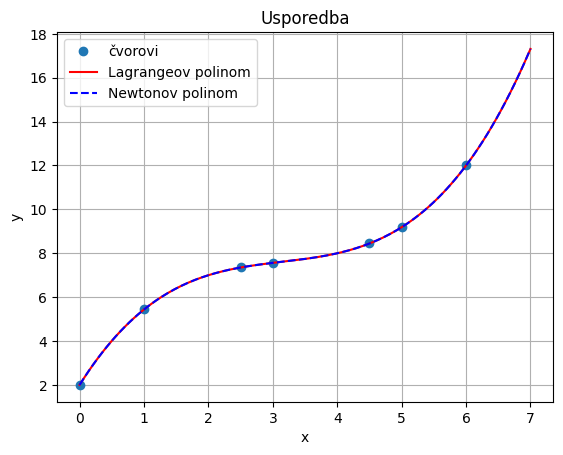

In [15]:

plt.figure()
plt.plot(x, y, "o", label="čvorovi")
plt.plot(x_new, y_new, "r", label="Lagrangeov polinom")
plt.plot(x_new_N, y_new_N, "b--", label="Newtonov polinom")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Usporedba")
plt.grid(True)
plt.legend()
plt.show()



4. Usporedite rezultate i komentirajte utjecaj redoslijeda čvorova na stabilnost interpolacije.


Obje metode daju isti graf, no kada pogledamo rezultate za x=4

y(4) za Lagrangea: 7.999973587301959

y(4) za Newtona 7.999973587301588

možemo vidjeti da ipak postoji neka sitna razlika, dakle grafovi nisu doslovno isti

In [16]:
print("razlika",abs(P(4)-newton_evaluate(x,a,4)))

razlika 3.7125857943465235e-13
